In [7]:
import os
import sys

sys.path.append(os.path.join('..'))
from models import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset rings5-regular

In [8]:
def train_initialy(model):
    model.train(epochs=1000, batch=True, learning_rate=0.01, save_till_best=True)

def train_model(model):
    model.train(epochs=1000, batch=True, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9, save_till_best=True)
    model.train(epochs=2000, batch=True, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=10, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.99, save_till_best=True)
    model.train(epochs=2000, batch=True, batch_size=100, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.999, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=24, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9999, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=10, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9999, save_till_best=True)

In [9]:
dataset_name = 'rings3-regular'
last_layer_activation_func = Sigmoid()
loss_func = "cross_entropy"
target_precision = 1e-6
models = [
    MLP(
        architecture=MLPArchitecture(2, [80], 3),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        initializer=XavierNormalInitializer(),
        target_precision=target_precision,
        name="[80] - tanh"
    ),
    MLP(
        architecture=MLPArchitecture(2, [40, 40], 3),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        target_precision=target_precision,
        initializer=XavierNormalInitializer(),
        name="[40, 40] - tanh"
    ),
    MLP(
        architecture=MLPArchitecture(2, [20, 40, 20], 3),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        target_precision=target_precision,
        initializer=XavierNormalInitializer(),
        name="[20, 40, 20] - sigmoid"
    ),
]

for model in models:
    print(f"Training model: {model.name}")

Training model: [80] - tanh
Training model: [40, 40] - tanh
Training model: [20, 40, 20] - sigmoid


# First look at the dataset

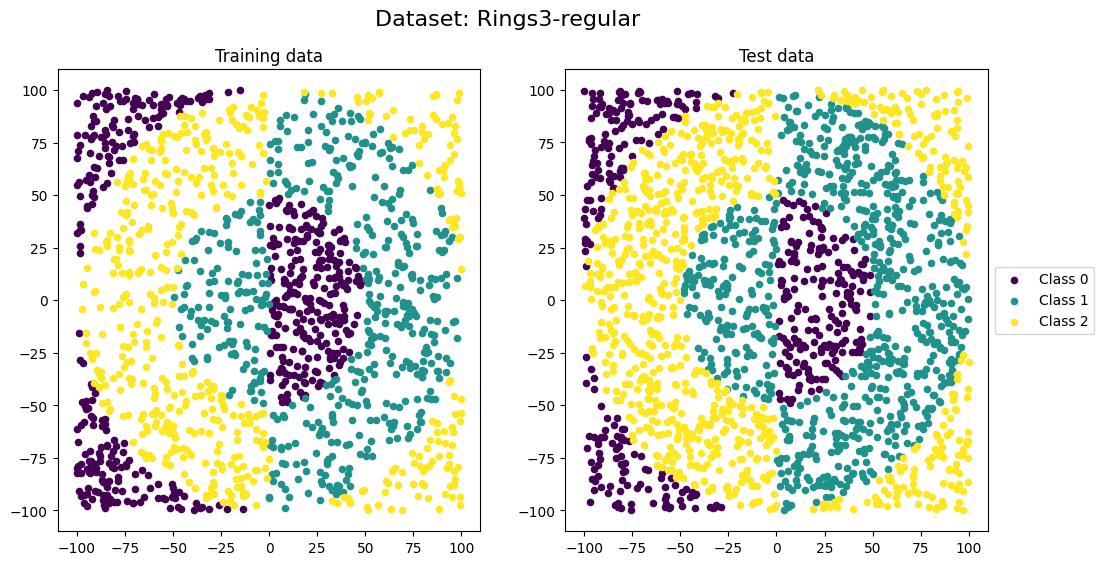

In [10]:
models[0].plot_classification_data()

### Model 1: `[80] - tanh`

In [11]:
model1 = models[0]
train_initialy(model1)

Training from age 0: (best_loss_test: inf, loss_test: 1.298084):   0%|          | 0/1000 [00:00<?, ?it/s]

Training from age 0: (best_loss_test: 0.572569, loss_test: 0.621604): 100%|██████████| 1000/1000 [00:08<00:00, 123.99it/s]

--------------------
Reverting to best model at age 864
Loss on train set: 0.552343	Loss on test set: 0.572569
--------------------
Model training finished at age 864 with loss 0.572569 on test set


Model: [80] - tanh
Age: 864
Train Loss: 0.552343
Test Loss: 0.572569
Accuracy: 0.7505
F1 Score: 0.7479
Model made 1501 / 2000 correct predictions on the test set.
There were 499 incorrect predictions.


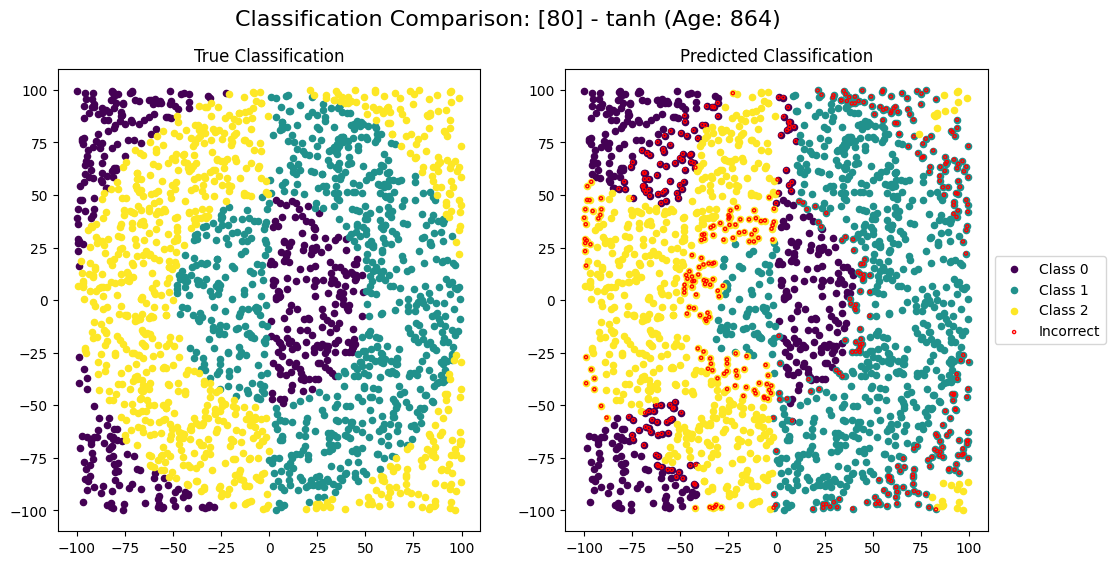

In [12]:
model1.plot_classification_comparison()

In [13]:
train_model(model1)

Training from age 864: (best_loss_test: 0.186701, loss_test: 0.186701): 100%|██████████| 1000/1000 [00:08<00:00, 113.57it/s]


--------------------
Reverting to best model at age 1863
Loss on train set: 0.155311	Loss on test set: 0.186701
--------------------
Model training finished at age 1863 with loss 0.186701 on test set


Training from age 1863: (best_loss_test: 0.128038, loss_test: 0.138362): 100%|██████████| 2000/2000 [00:17<00:00, 115.21it/s]


--------------------
Reverting to best model at age 3799
Loss on train set: 0.078615	Loss on test set: 0.128038
--------------------
Model training finished at age 3799 with loss 0.128038 on test set


Training from age 3799: (best_loss_test: 0.128038, loss_test: 0.181104): 100%|██████████| 1000/1000 [00:16<00:00, 62.09it/s]


--------------------
Reverting to best model at age 3799
Loss on train set: 0.078615	Loss on test set: 0.128038
--------------------
Model training finished at age 3799 with loss 0.128038 on test set


Training from age 3799: (best_loss_test: 0.118627, loss_test: 0.130796): 100%|██████████| 2000/2000 [00:15<00:00, 132.73it/s]


--------------------
Reverting to best model at age 5229
Loss on train set: 0.060152	Loss on test set: 0.118627
--------------------
Model training finished at age 5229 with loss 0.118627 on test set


Training from age 5229: (best_loss_test: 0.118627, loss_test: 0.141086): 100%|██████████| 1000/1000 [00:10<00:00, 95.04it/s]


--------------------
Reverting to best model at age 5229
Loss on train set: 0.060152	Loss on test set: 0.118627
--------------------
Model training finished at age 5229 with loss 0.118627 on test set


Training from age 5229: (best_loss_test: 0.118627, loss_test: 0.156827): 100%|██████████| 1000/1000 [00:15<00:00, 62.57it/s]

--------------------
Reverting to best model at age 5229
Loss on train set: 0.060152	Loss on test set: 0.118627
--------------------
Model training finished at age 5229 with loss 0.118627 on test set


Model: [80] - tanh
Age: 5229
Train Loss: 0.060152
Test Loss: 0.118627
Accuracy: 0.9525
F1 Score: 0.9525
Model made 1905 / 2000 correct predictions on the test set.
There were 95 incorrect predictions.


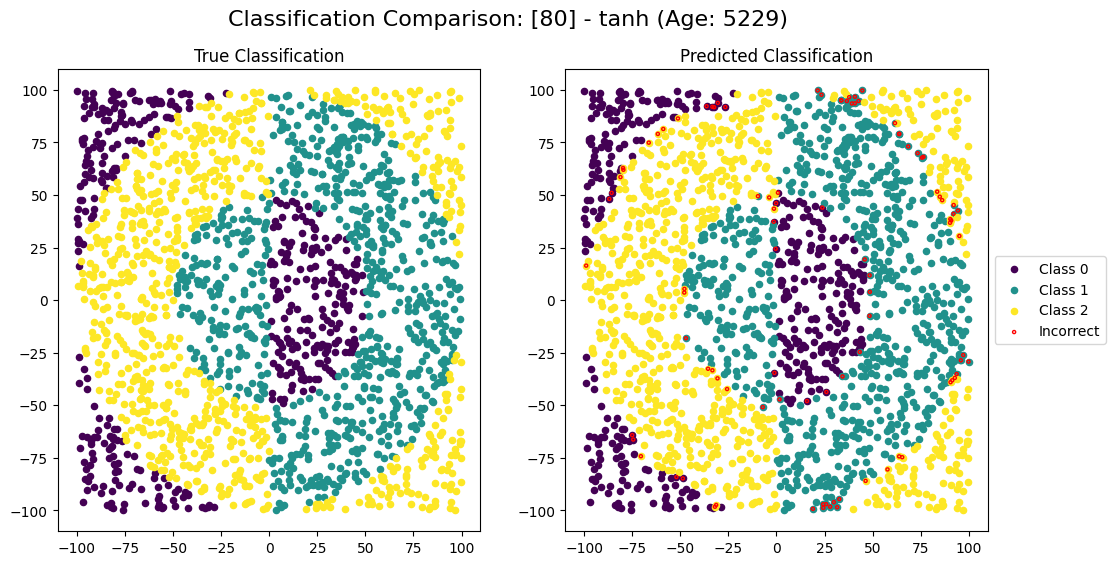

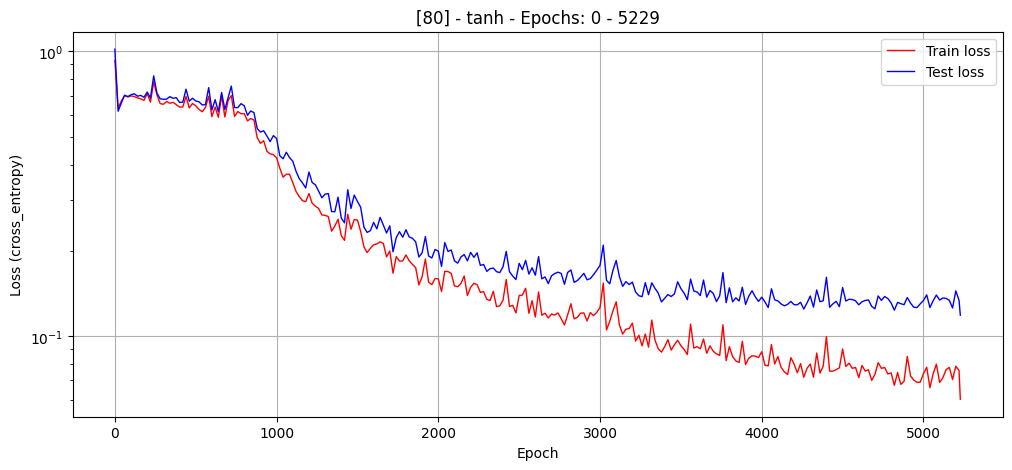

In [14]:
model1.plot_classification_comparison()
model1.plot_history(smoothing_interval=20)

### Model 2: `[40, 40] - tanh`

In [15]:
model2 = models[1]
train_initialy(model1)

Training from age 5229: (best_loss_test: 0.118627, loss_test: 0.458409): 100%|██████████| 1000/1000 [00:08<00:00, 123.25it/s]

--------------------
Reverting to best model at age 5229
Loss on train set: 0.060152	Loss on test set: 0.118627
--------------------
Model training finished at age 5229 with loss 0.118627 on test set


Model: [40, 40] - tanh
Age: 0
Train Loss: 0.739513
Test Loss: 0.728062
Accuracy: 0.268
F1 Score: 0.2419
Model made 536 / 2000 correct predictions on the test set.
There were 1464 incorrect predictions.


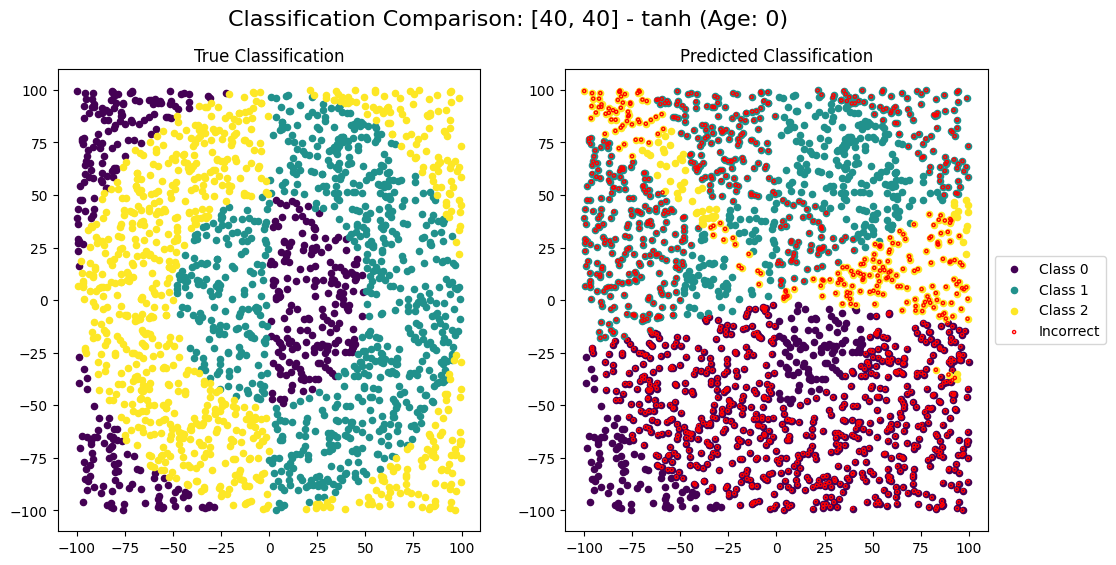

In [16]:
model2.plot_classification_comparison()

In [17]:
train_model(model2)

Training from age 0: (best_loss_test: 0.139893, loss_test: 0.18004): 100%|██████████| 1000/1000 [00:08<00:00, 113.76it/s]


--------------------
Reverting to best model at age 930
Loss on train set: 0.095047	Loss on test set: 0.139893
--------------------
Model training finished at age 930 with loss 0.139893 on test set


Training from age 930: (best_loss_test: 0.121777, loss_test: 0.164926): 100%|██████████| 2000/2000 [00:17<00:00, 115.03it/s]


--------------------
Reverting to best model at age 2236
Loss on train set: 0.04987	Loss on test set: 0.121777
--------------------
Model training finished at age 2236 with loss 0.121777 on test set


Training from age 2236: (best_loss_test: 0.121777, loss_test: 0.241481): 100%|██████████| 1000/1000 [00:20<00:00, 49.56it/s]


--------------------
Reverting to best model at age 2236
Loss on train set: 0.04987	Loss on test set: 0.121777
--------------------
Model training finished at age 2236 with loss 0.121777 on test set


Training from age 2236: (best_loss_test: 0.121382, loss_test: 0.181476): 100%|██████████| 2000/2000 [00:14<00:00, 137.17it/s]


--------------------
Reverting to best model at age 2315
Loss on train set: 0.050679	Loss on test set: 0.121382
--------------------
Model training finished at age 2315 with loss 0.121382 on test set


Training from age 2315: (best_loss_test: 0.121382, loss_test: 0.208633): 100%|██████████| 1000/1000 [00:11<00:00, 84.24it/s]


--------------------
Reverting to best model at age 2315
Loss on train set: 0.050679	Loss on test set: 0.121382
--------------------
Model training finished at age 2315 with loss 0.121382 on test set


Training from age 2315: (best_loss_test: 0.121382, loss_test: 0.225436): 100%|██████████| 1000/1000 [00:20<00:00, 49.25it/s]

--------------------
Reverting to best model at age 2315
Loss on train set: 0.050679	Loss on test set: 0.121382
--------------------
Model training finished at age 2315 with loss 0.121382 on test set


Model: [40, 40] - tanh
Age: 2315
Train Loss: 0.050679
Test Loss: 0.121382
Accuracy: 0.9495
F1 Score: 0.9495
Model made 1899 / 2000 correct predictions on the test set.
There were 101 incorrect predictions.


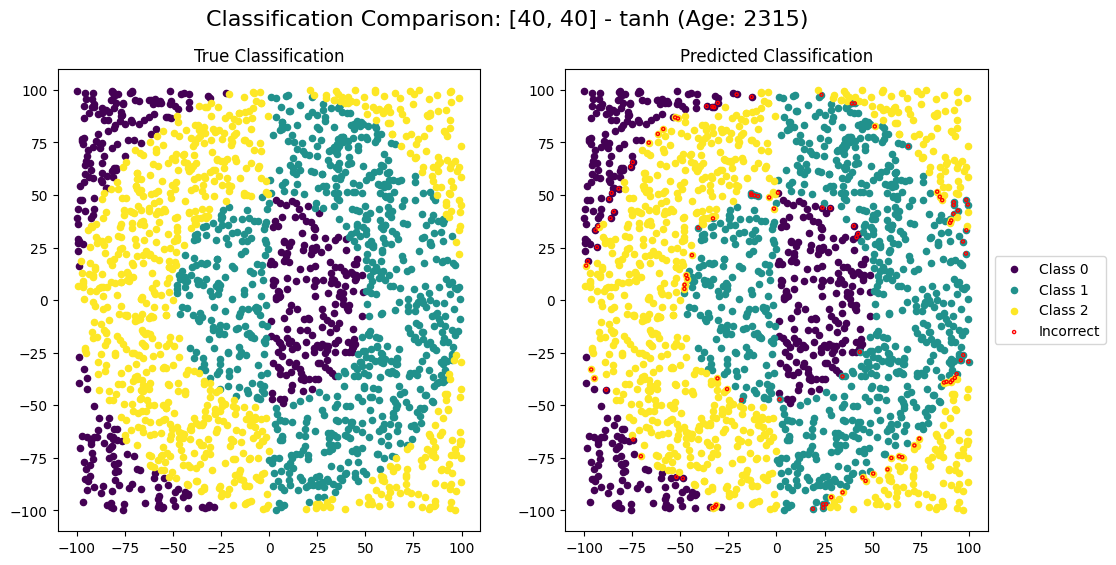

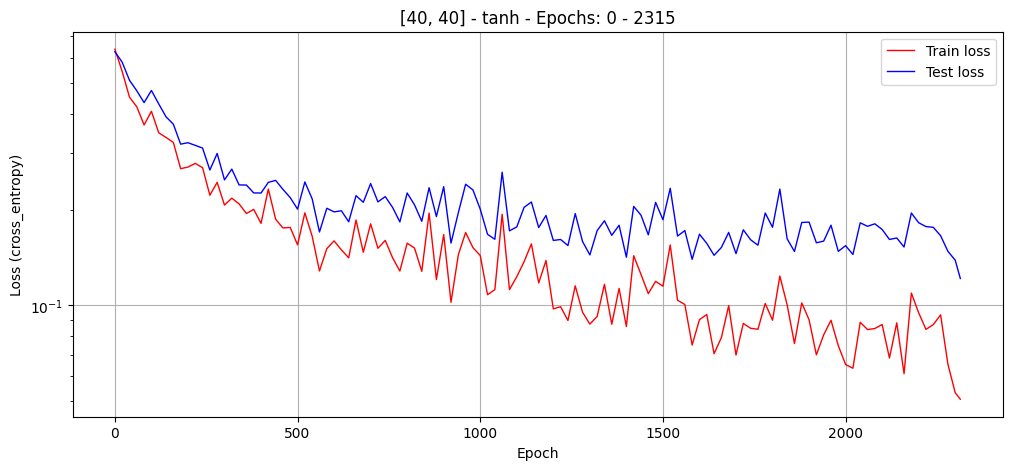

In [18]:
model2.plot_classification_comparison()
model2.plot_history(smoothing_interval=20)

### Model 3: `[20, 40, 20] - sigmoid`

In [19]:
model3 = models[2]
train_initialy(model1)

Training from age 5229: (best_loss_test: 0.118627, loss_test: 0.489758): 100%|██████████| 1000/1000 [00:07<00:00, 129.08it/s]

--------------------
Reverting to best model at age 5229
Loss on train set: 0.060152	Loss on test set: 0.118627
--------------------
Model training finished at age 5229 with loss 0.118627 on test set


Model: [20, 40, 20] - sigmoid
Age: 0
Train Loss: 0.750421
Test Loss: 0.769773
Accuracy: 0.3235
F1 Score: 0.3266
Model made 647 / 2000 correct predictions on the test set.
There were 1353 incorrect predictions.


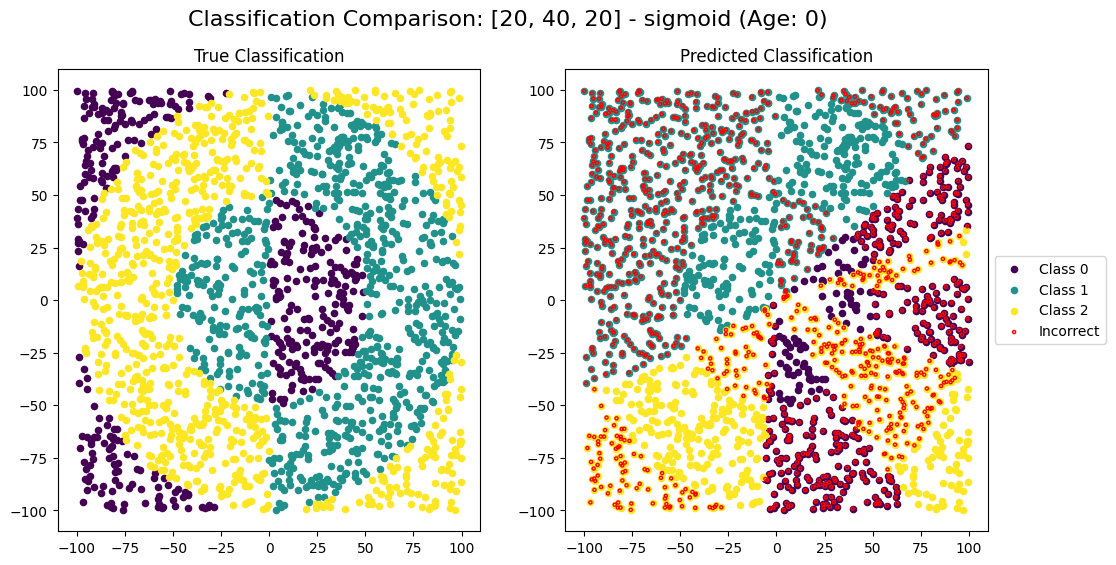

In [20]:
model3.plot_classification_comparison()

In [21]:
train_model(model3)

Training from age 0: (best_loss_test: 0.166495, loss_test: 0.23458): 100%|██████████| 1000/1000 [00:10<00:00, 97.72it/s] 


--------------------
Reverting to best model at age 973
Loss on train set: 0.111646	Loss on test set: 0.166495
--------------------
Model training finished at age 973 with loss 0.166495 on test set


Training from age 973: (best_loss_test: 0.14744, loss_test: 0.233998): 100%|██████████| 2000/2000 [00:20<00:00, 97.94it/s]  


--------------------
Reverting to best model at age 2010
Loss on train set: 0.092798	Loss on test set: 0.14744
--------------------
Model training finished at age 2010 with loss 0.14744 on test set


Training from age 2010: (best_loss_test: 0.14744, loss_test: 0.228005): 100%|██████████| 1000/1000 [00:25<00:00, 39.47it/s]


--------------------
Reverting to best model at age 2010
Loss on train set: 0.092798	Loss on test set: 0.14744
--------------------
Model training finished at age 2010 with loss 0.14744 on test set


Training from age 2010: (best_loss_test: 0.145629, loss_test: 0.227008): 100%|██████████| 2000/2000 [00:16<00:00, 123.57it/s]


--------------------
Reverting to best model at age 3355
Loss on train set: 0.088861	Loss on test set: 0.145629
--------------------
Model training finished at age 3355 with loss 0.145629 on test set


Training from age 3355: (best_loss_test: 0.145629, loss_test: 0.19082): 100%|██████████| 1000/1000 [00:13<00:00, 72.55it/s]


--------------------
Reverting to best model at age 3355
Loss on train set: 0.088861	Loss on test set: 0.145629
--------------------
Model training finished at age 3355 with loss 0.145629 on test set


Training from age 3355: (best_loss_test: 0.145629, loss_test: 0.243931): 100%|██████████| 1000/1000 [00:25<00:00, 39.58it/s]

--------------------
Reverting to best model at age 3355
Loss on train set: 0.088861	Loss on test set: 0.145629
--------------------
Model training finished at age 3355 with loss 0.145629 on test set


Model: [20, 40, 20] - sigmoid
Age: 3355
Train Loss: 0.088861
Test Loss: 0.145629
Accuracy: 0.9465
F1 Score: 0.9464
Model made 1893 / 2000 correct predictions on the test set.
There were 107 incorrect predictions.


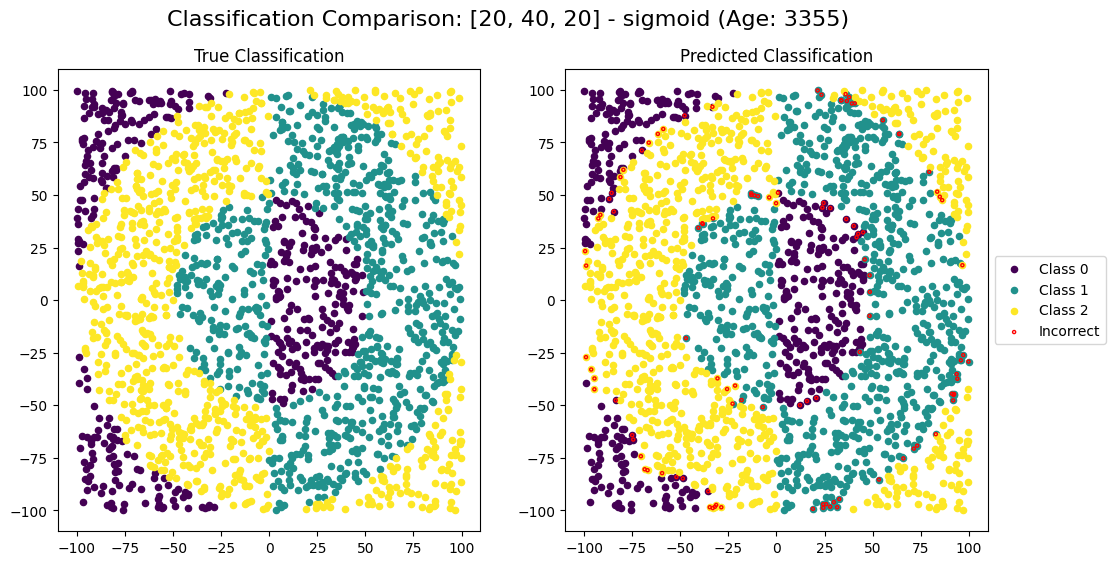

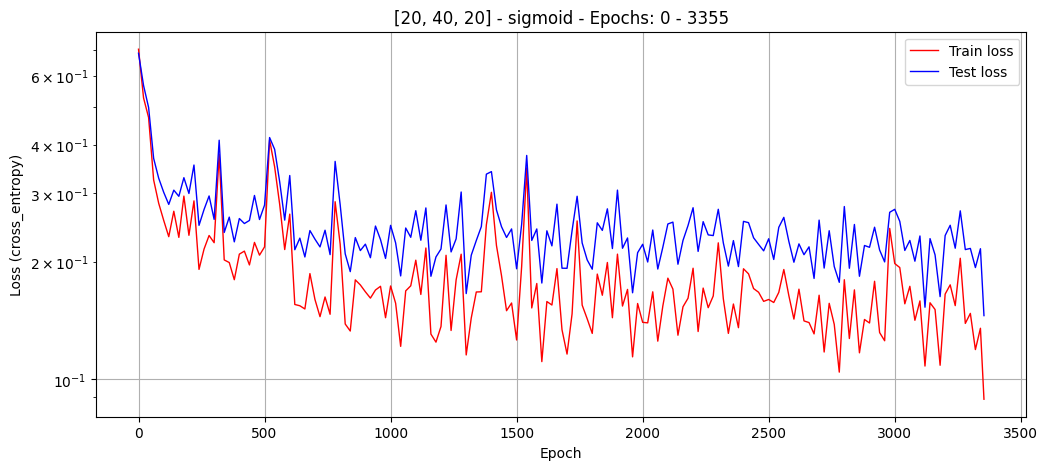

In [22]:
model3.plot_classification_comparison()
model3.plot_history(smoothing_interval=20)